First,load the dataset into a pandas DataFrame. The file is located at `/content/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls`.

In [20]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')


first few rows of the data and its overall information to understand its structure

In [21]:
# Display the first 5 rows
display(df.head())

# Display DataFrame information
display(df.info())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

Given the 'Customer Churn Prediction' project, the target column for our model will be 'Churn'.

First,check and handle any missing values, especially in `TotalCharges`.

In [26]:
import numpy as np

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' values with 0 (as they often represent new customers)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify no more missing values in TotalCharges
print(f"Missing values in TotalCharges after handling: {df['TotalCharges'].isnull().sum()}")

Missing values in TotalCharges after handling: 0


encode categorical features using one-hot encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns excluding 'customerID' and 'Churn'
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn']]

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


convert the target variable 'Churn' into a binary format (0 or 1).

In [24]:
# Convert 'Churn' column to binary (Yes=1, No=0)
df_encoded['Churn'] = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the value counts for Churn to confirm conversion
print(df_encoded['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Spliting the dataset into training and testing sets for model development.

In [25]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


First, train a Logistic Regression model on our prepared data

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear for small datasets/L1/L2 regularization
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8027
Precision: 0.6529
Recall: 0.5481
F1-Score: 0.5959


visualize the model's performance with a confusion matrix

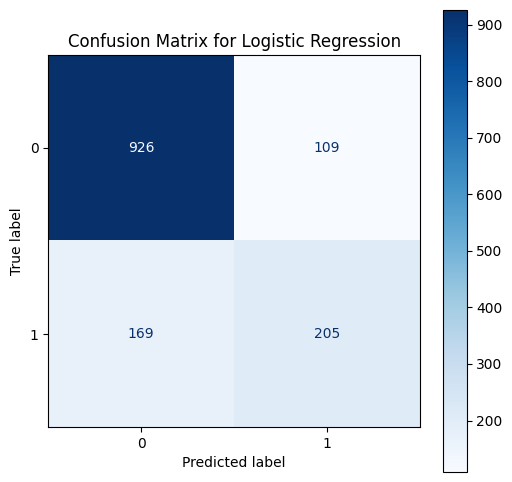

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

train a Random Forest Classifier to see if we can improve performance

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")

Random Forest Accuracy: 0.7850
Random Forest Precision: 0.6179
Random Forest Recall: 0.4973
Random Forest F1-Score: 0.5511


Comparing the performance of the Random Forest model with the Logistic Regression model.

In [30]:
print("\n--- Model Comparison ---")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Logistic Regression F1-Score: {f1:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")


--- Model Comparison ---
Logistic Regression Accuracy: 0.8027
Random Forest Accuracy: 0.7850
Logistic Regression Precision: 0.6529
Random Forest Precision: 0.6179
Logistic Regression Recall: 0.5481
Random Forest Recall: 0.4973
Logistic Regression F1-Score: 0.5959
Random Forest F1-Score: 0.5511


## Model Comparison

Logistic Regression performed better on this dataset.
It achieved higher accuracy and F1-score than Random Forest.

This suggests that the relationship between features and churn
is mostly linear in nature.



# Conclusion

This project predicts whether a customer is likely to churn.
Logistic Regression performed better than Random Forest on this dataset.
The model can help businesses identify customers at risk of leaving.
One limitation is that the model depends heavily on existing features.
In the future, adding customer usage behavior could improve results.